# Desafio 1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Desafio 1
1. Número de nós: 19717 | Número de arestas: 44327
2. Grau mínimo: 1 | Grau médio: 4.496322970025866 | Grau máximo: 171
3. Densidade da rede: 0.00022805452272397372
4. Número médio de triângulos: 0.6349850382918294
5. Coeficiente de agrupamento médio: 0.06017520943752375
6. Diametro da rede (aproximado): 17
7. Número de componentes conexos fracos: 1 | Número de nós: 19717 | Número de arestas: 19717
8. Número de componentes conexos fortes: 19706 | Número de nós: 2 | Número de arestas: 2
9. Os 5 vértices de maior grau: [(9742976, 171), (8366922, 154), (11832527, 131), (19479186, 130), (18776148, 125)]
10. O vértice de maior centralidade de intermediação (aproximado): [(8366922, 0.10045621856688557)]
11. O vértice de maior centralidade do autovetor: [(33

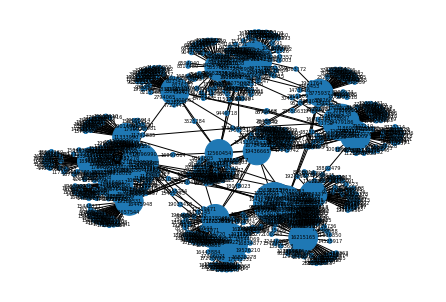

In [1]:
#Trabalho 2 - Grafos
#Lucas Miranda Mendonça Rezende
#12542838

#Se ocorrer algum problema no plot, descomente a próxima linha
!pip install scipy==1.8

import networkx as nx
import scipy
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

#(!!!!!) Aonde está a pasta "pubmed-diabetes" no seu google drive
script_dir = "/content/drive/MyDrive/Grafos AED2/"

#Abrindo o arquivo de citações (Google Drive)
rel_path = "pubmed-diabetes/data/Pubmed-Diabetes.DIRECTED.cites.tab"
abs_file_path = script_dir + rel_path

f_cites = open(abs_file_path, "r")
lines_cites = f_cites.readlines()

#Tirando as primeiras linhas do arquivo
lines_cites.remove(lines_cites[1])
lines_cites.remove(lines_cites[0])

#Criando grafo NÃO DIRECIONADO
G = nx.Graph()

#Criando grafo DIRECIONADO 
DG = nx.DiGraph()

#Para cada linha, pegar os números de referência dos papers e adicionar como aresta do grafo
for line in lines_cites:

    line_content = line.split()

    ref1 = line_content[1].split(":")[1].strip()
    ref2 = line_content[3].split(":")[1].strip()

    G.add_edge(int(ref1), int(ref2))
    DG.add_edge(int(ref1), int(ref2))



#DESAFIO 1
print("\nDesafio 1")

#1. Némero de nós e arestas
print("1. Número de nós:", G.number_of_nodes() ,"| Número de arestas:", G.number_of_edges())

#2. Grau mínimo, médio e máximo
print("2. Grau mínimo:", min(dict(G.degree()).values()), "| Grau médio:", sum(dict(G.degree()).values())/len(dict(G.degree()).values()), "| Grau máximo:", max(dict(G.degree()).values()))

#3. Densidade da rede
print("3. Densidade da rede:", nx.density(G))

#4. Número médio de triângulos
number_of_triangles = sum(nx.triangles(G).values()) / 3
avarage_number_of_triangles = number_of_triangles / G.number_of_nodes()
print("4. Número médio de triângulos:", avarage_number_of_triangles)

#5. Média do coeficiente de agrupamento (clustering)
print("5. Coeficiente de agrupamento médio:", nx.average_clustering(G))

#6. Diâmetro da rede
print("6. Diametro da rede (aproximado):", nx.approximation.diameter(G)) #17 ou 18, sem usar aproximação fica extremamente lento

#7. Número de componentes conexos fracos, além do número de nós e arestas para o maior destes componentes
print("7. Número de componentes conexos fracos:", nx.number_weakly_connected_components(DG), "| Número de nós:", max([len(c) for c in sorted(nx.weakly_connected_components(DG), key=len, reverse=True)]), "| Número de arestas:", max([len(c) for c in sorted(nx.weakly_connected_components(DG), key=len, reverse=True)]))

#8. Número de componentes conexos fortes, além do número de nós e arestas para o maior destes componentes
print("8. Número de componentes conexos fortes:", nx.number_strongly_connected_components(DG), "| Número de nós:", max([len(c) for c in sorted(nx.strongly_connected_components(DG), key=len, reverse=True)]), "| Número de arestas:", max([len(c) for c in sorted(nx.strongly_connected_components(DG), key=len, reverse=True)]))

#9. Elencar os 5 vértices de maior grau
print("9. Os 5 vértices de maior grau:", sorted(dict(G.degree()).items(), key=lambda x: x[1], reverse=True)[:5])

#10. Elucidar o vértice de maior centralidade de intermediação (betweenness centrality)
central_bet = sorted(nx.betweenness_centrality(G, k=100).items(), key=lambda x: x[1], reverse=True)[:1]
print("10. O vértice de maior centralidade de intermediação (aproximado):", central_bet)

#11. O vértice de maior eigenvector centrality, ou centralidade do autovetor.
central_vector = sorted(nx.eigenvector_centrality(G).items(), key=lambda x: x[1], reverse=True)[:1]
print("11. O vértice de maior centralidade do autovetor:", central_vector)



#Criando uma representação aproximada do grafo
DrawMe = nx.Graph()

vert_maior_grau_quant = 20 #Quantos vértices de maior grau serão desenhados
edge_limit = 50 #Quantas arestas serão consideradas para cada vértice

vert_maior_grau = sorted(dict(G.degree()).items(), key=lambda x: x[1], reverse=True)[:vert_maior_grau_quant]

for vert in vert_maior_grau:
    DrawMe.add_node(vert[0], size=vert[1]*10)
    
    count = 0
    for edge in G.edges(vert[0]):
        if(count>=edge_limit):
            break
        count+=1
        
        if(edge[0] not in DrawMe.nodes):
            DrawMe.add_node(edge[0], size=20)
            
        if(edge[1] not in DrawMe.nodes):
            DrawMe.add_node(edge[1], size=20)
        
        DrawMe.add_edge(edge[0], edge[1])

print("\nFazendo representação aproximada do grafo")
print("Número de nós principais considerados:", vert_maior_grau_quant)
print("Número de arestas consideradas por nó:", edge_limit)
print("Número de nós total do grafo:", DrawMe.number_of_nodes())
print("Número de arestas do grafo:", DrawMe.number_of_edges())

pos = nx.spring_layout(DrawMe, scale=100, k=0.22, iterations=120) #Configurações de plotagem

print("Plotando...")
nx.draw(DrawMe, pos, node_size=[v[1] for v in DrawMe.nodes.data('size')], with_labels=True, font_size=5)
plt.show()

# Desafio 2

In [2]:
#Trabalho 2 - Grafos
#Lucas Miranda Mendonça Rezende
#12542838

#Criando grafo DIRECIONADO 
DG_all = nx.DiGraph() #Grafo com todos os papers
DG1 = nx.DiGraph() #Subgrafo com apenas paper DM = 1
DG2 = nx.DiGraph() #Subgrafo com apenas paper DM = 2
DG3 = nx.DiGraph() #Subgrafo com apenas paper DM = 3

#Abrindo o arquivo de descrição dos papers (Google Drive)
rel_path = "pubmed-diabetes/data/Pubmed-Diabetes.NODE.paper.tab"
abs_file_path = script_dir + rel_path

f_desc = open(abs_file_path, "r")
lines_desc = f_desc.readlines()

#Tirando as primeiras linhas do arquivo
lines_desc.remove(lines_desc[1])
lines_desc.remove(lines_desc[0])

#Criando nós do grafo com o tipo de DM
for line in lines_desc:
    line_content = line.split()
    
    ref1 = line_content[0].strip()
    ref2 = line_content[1].split("=")[1].strip()
    
    DG_all.add_node(int(ref1), title=int(ref2))
    
    if(int(ref2) == 1):
        DG1.add_node(int(ref1), title=int(ref2))
    elif(int(ref2) == 2):
        DG2.add_node(int(ref1), title=int(ref2))
    elif(int(ref2) == 3):
        DG3.add_node(int(ref1), title=int(ref2))

#Abrindo o arquivo de citações (Google Drive)
rel_path = "pubmed-diabetes/data/Pubmed-Diabetes.DIRECTED.cites.tab"
abs_file_path = script_dir + rel_path

f_cites = open(abs_file_path, "r")
lines_cites = f_cites.readlines()

#Tirando as primeiras linhas do arquivo
lines_cites.remove(lines_cites[1])
lines_cites.remove(lines_cites[0])

#Para cada linha, pegar os números de referência dos papers e adicionar como aresta do grafo
all_nodes = dict(list(DG_all.nodes.data("title")))
for line in lines_cites:

    line_content = line.split()

    ref1 = line_content[1].split(":")[1].strip()
    ref2 = line_content[3].split(":")[1].strip()

    DG_all.add_edge(int(ref1), int(ref2))

    if(all_nodes[int(ref1)] == 1 and all_nodes[int(ref2)] == 1):
        DG1.add_edge(int(ref1), int(ref2))
    elif(all_nodes[int(ref1)] == 2 and all_nodes[int(ref2)] == 2):
        DG2.add_edge(int(ref1), int(ref2))
    elif(all_nodes[int(ref1)] == 3 and all_nodes[int(ref2)] == 3):
        DG3.add_edge(int(ref1), int(ref2))

#Grafos/subgrafos e suas informações
print("\nDG_all |", "Nós:", DG_all.number_of_nodes(), "| Arestas:", DG_all.number_of_edges())
print("DG1 |", "Nós:", DG1.number_of_nodes(), "| Arestas:", DG1.number_of_edges())
print("DG2 |", "Nós:", DG2.number_of_nodes(), "| Arestas:", DG2.number_of_edges())
print("DG3 |", "Nós:", DG3.number_of_nodes(), "| Arestas:", DG3.number_of_edges())



#DESAFIO 2
print("\n\nDesafio 2")

#1.1. Qual o inDegree e outDegree total dos grafos
print("\n1.1. Qual o inDegree e outDegree total dos grafos")
print("DG_all |", "inDegree:", sum(dict(DG_all.in_degree()).values()), "| outDegree:", sum(dict(DG_all.out_degree()).values()))
print("DG1 |", "inDegree:", sum(dict(DG1.in_degree()).values()), "| outDegree:", sum(dict(DG1.out_degree()).values()))
print("DG2 |", "inDegree:", sum(dict(DG2.in_degree()).values()), "| outDegree:", sum(dict(DG2.out_degree()).values()))
print("DG3 |", "inDegree:", sum(dict(DG3.in_degree()).values()), "| outDegree:", sum(dict(DG3.out_degree()).values()))

#1.2. Os 3 vértices com maiores inDegree e outDegree de cada grafo
print("\n1.2. Os 3 vértices com maiores inDegree e outDegree de cada grafo")
print("DG_all ", "\n -inDegree:", sorted(dict(DG_all.in_degree()).items(), key=lambda x: x[1], reverse=True)[:3], "\n -outDegree:", sorted(dict(DG_all.out_degree()).items(), key=lambda x: x[1], reverse=True)[:3])
print("DG1 ", "\n -inDegree:", sorted(dict(DG1.in_degree()).items(), key=lambda x: x[1], reverse=True)[:3], "\n -outDegree:", sorted(dict(DG1.out_degree()).items(), key=lambda x: x[1], reverse=True)[:3])
print("DG2 ", "\n -inDegree:", sorted(dict(DG2.in_degree()).items(), key=lambda x: x[1], reverse=True)[:3], "\n -outDegree:", sorted(dict(DG2.out_degree()).items(), key=lambda x: x[1], reverse=True)[:3])
print("DG3 ", "\n -inDegree:", sorted(dict(DG3.in_degree()).items(), key=lambda x: x[1], reverse=True)[:3], "\n -outDegree:", sorted(dict(DG3.out_degree()).items(), key=lambda x: x[1], reverse=True)[:3])

#2. Calcule a reciprocidade do vértice com maior inDegree e do vértice com maior outDegree
print("\n2. Reciprocidade do vértice com maior inDegree e do vértice com maior outDegree")
DG_biggest_inDegree = sorted(dict(DG_all.in_degree()).items(), key=lambda x: x[1], reverse=True)[0][0]
DG_biggest_outDegree = sorted(dict(DG_all.out_degree()).items(), key=lambda x: x[1], reverse=True)[0][0]
DG_inDegree_reciprocity = nx.reciprocity(DG_all, nodes=DG_biggest_inDegree)
DG_outDegree_reciprocity = nx.reciprocity(DG_all, nodes=DG_biggest_outDegree)
print("DG_all")
print(" -Maior inDegree:", DG_biggest_inDegree, "| Reciprocidade:", DG_inDegree_reciprocity)
print(" -Maior outDegree:", DG_biggest_outDegree, "| Reciprocidade:", DG_outDegree_reciprocity)

DG1_biggest_inDegree = sorted(dict(DG1.in_degree()).items(), key=lambda x: x[1], reverse=True)[0][0]
DG1_biggest_outDegree = sorted(dict(DG1.out_degree()).items(), key=lambda x: x[1], reverse=True)[0][0]
DG1_inDegree_reciprocity = nx.reciprocity(DG1, nodes=DG1_biggest_inDegree)
DG1_outDegree_reciprocity = nx.reciprocity(DG1, nodes=DG1_biggest_outDegree)
print("DG1")
print(" -Maior inDegree:", DG1_biggest_inDegree, "| Reciprocidade:", DG1_inDegree_reciprocity)
print(" -Maior outDegree:", DG1_biggest_outDegree, "| Reciprocidade:", DG1_outDegree_reciprocity)

DG2_biggest_inDegree = sorted(dict(DG2.in_degree()).items(), key=lambda x: x[1], reverse=True)[0][0]
DG2_biggest_outDegree = sorted(dict(DG2.out_degree()).items(), key=lambda x: x[1], reverse=True)[0][0]
DG2_inDegree_reciprocity = nx.reciprocity(DG2, nodes=DG2_biggest_inDegree)
DG2_outDegree_reciprocity = nx.reciprocity(DG2, nodes=DG2_biggest_outDegree)
print("DG2")
print(" -Maior inDegree:", DG2_biggest_inDegree, "| Reciprocidade:", DG2_inDegree_reciprocity)
print(" -Maior outDegree:", DG2_biggest_outDegree, "| Reciprocidade:", DG2_outDegree_reciprocity)

DG3_biggest_inDegree = sorted(dict(DG3.in_degree()).items(), key=lambda x: x[1], reverse=True)[0][0]
DG3_biggest_outDegree = sorted(dict(DG3.out_degree()).items(), key=lambda x: x[1], reverse=True)[0][0]
DG3_inDegree_reciprocity = nx.reciprocity(DG3, nodes=DG3_biggest_inDegree)
DG3_outDegree_reciprocity = nx.reciprocity(DG3, nodes=DG3_biggest_outDegree)
print("DG3")
print(" -Maior inDegree:", DG3_biggest_inDegree, "| Reciprocidade:", DG3_inDegree_reciprocity)
print(" -Maior outDegree:", DG3_biggest_outDegree, "| Reciprocidade:", DG3_outDegree_reciprocity)

#3. Calcule a reciprocidade de todo o grafo
print("\n3. Reciprocidade de todo o grafo")
print("DG_all |", nx.overall_reciprocity(DG_all))
print("DG1 |", nx.overall_reciprocity(DG1))
print("DG2 |", nx.overall_reciprocity(DG2))
print("DG3 |", nx.overall_reciprocity(DG3))

#4. Calcule o pagerank dos 3 vértices mais citados de cada grafo
print("\n4. Pagerank dos 3 vértices mais citados de cada grafo")

DG_pageRank = nx.pagerank(DG_all, max_iter=1000, alpha=0.85, tol=1e-06, nstart=None, weight='weight', dangling=None)
print("DG_all |", sorted(DG_pageRank.items(), key=lambda x: x[1], reverse=True)[:3])

DG1_pageRank = nx.pagerank(DG1, max_iter=1000, alpha=0.85, tol=1e-06, nstart=None, weight='weight', dangling=None)
print("DG1 |", sorted(DG1_pageRank.items(), key=lambda x: x[1], reverse=True)[:3])

DG2_pageRank = nx.pagerank(DG2, max_iter=1000, alpha=0.85, tol=1e-06, nstart=None, weight='weight', dangling=None)
print("DG2 |", sorted(DG2_pageRank.items(), key=lambda x: x[1], reverse=True)[:3])

DG3_pageRank = nx.pagerank(DG3, max_iter=1000, alpha=0.85, tol=1e-06, nstart=None, weight='weight', dangling=None)
print("DG3 |", sorted(DG3_pageRank.items(), key=lambda x: x[1], reverse=True)[:3])


DG_all | Nós: 19717 | Arestas: 44338
DG1 | Nós: 4103 | Arestas: 5214
DG2 | Nós: 7875 | Arestas: 15797
DG3 | Nós: 7739 | Arestas: 14567


Desafio 2

1.1. Qual o inDegree e outDegree total dos grafos
DG_all | inDegree: 44338 | outDegree: 44338
DG1 | inDegree: 5214 | outDegree: 5214
DG2 | inDegree: 15797 | outDegree: 15797
DG3 | inDegree: 14567 | outDegree: 14567

1.2. Os 3 vértices com maiores inDegree e outDegree de cada grafo
DG_all  
 -inDegree: [(9742976, 171), (8366922, 154), (11832527, 120)] 
 -outDegree: [(19479186, 130), (18776148, 125), (18664617, 121)]
DG1  
 -inDegree: [(3816968, 21), (2547480, 20), (3309126, 14)] 
 -outDegree: [(8012723, 32), (8894169, 30), (19054720, 27)]
DG2  
 -inDegree: [(8366922, 81), (3309680, 67), (8232539, 62)] 
 -outDegree: [(18776148, 122), (18664617, 99), (17349009, 80)]
DG3  
 -inDegree: [(9742976, 141), (11832527, 116), (11333990, 71)] 
 -outDegree: [(19479186, 119), (18561508, 75), (19436665, 74)]

2. Reciprocidade do vértice com maior inDegree